In [429]:
import sys
import datetime

sys.path.append('/Users/parisakhaleghi/Desktop/Coding/assist_projects/python/git_commit')

from git_commit import commit

commit( '/Users/parisakhaleghi/Desktop/Coding/ML-Engineering-sample-codes',
        '/Users/parisakhaleghi/Desktop/Coding/ML-Engineering-sample-codes/ML_with_python/8_logistic_regression_multiclass/logistic_regression_multiclass.ipynb',
        'update: measure accuracy using confusion metric and show it',
        datetime.datetime.now().year,
        datetime.datetime.now().month,
        datetime.datetime.now().day-8,
        datetime.datetime.now().hour,
        datetime.datetime.now().minute
        )

In [430]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [431]:
digits = load_digits()

In [432]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [433]:
print( datetime.datetime.now().day-8)

15


In [434]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

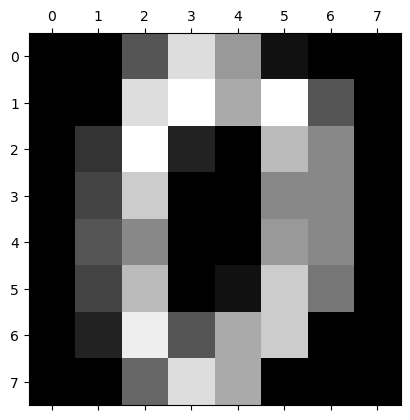

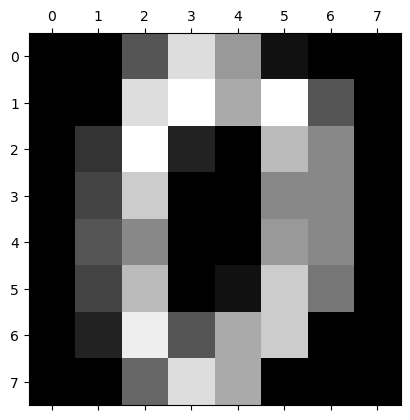

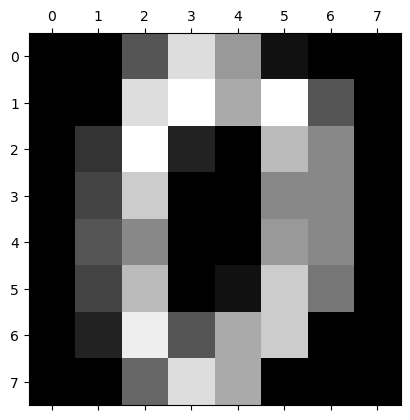

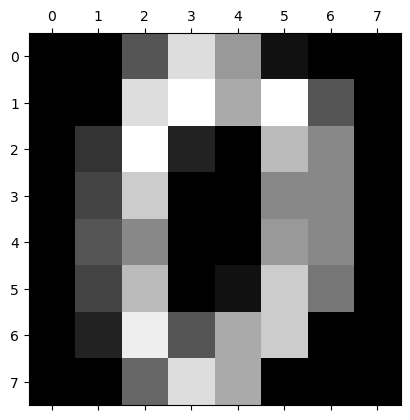

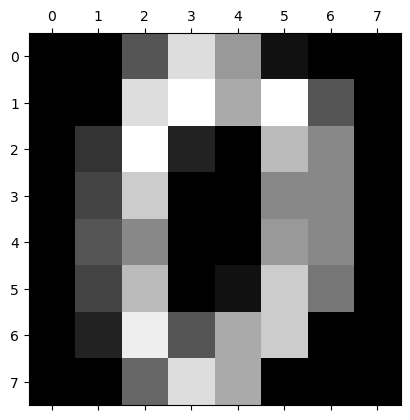

In [435]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[0])

In [436]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [437]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

In [438]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [439]:
# 80% of whole data
len(x_train) 

1437

In [440]:
# 20% of whole data
len(x_test) 

360

In [441]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [442]:
model.fit(x_train, y_train)

/Users/parisakhaleghi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [443]:
model.score(x_test, y_test)

0.9583333333333334

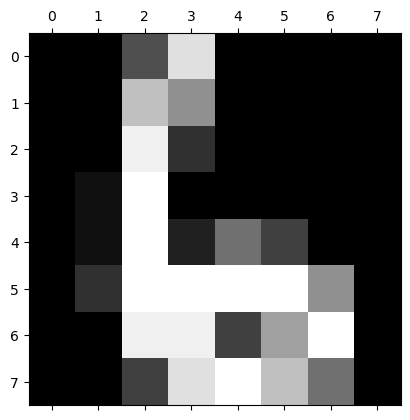

In [444]:
plt.matshow(digits.images[67])

In [445]:
digits.target[67]

6

In [446]:
# in here we use 'data'
model.predict([digits.data[67]])

array([6])

In [450]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  1, 32,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  1, 32,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 29]])

Text(95.72222222222221, 0.5, 'Truth')

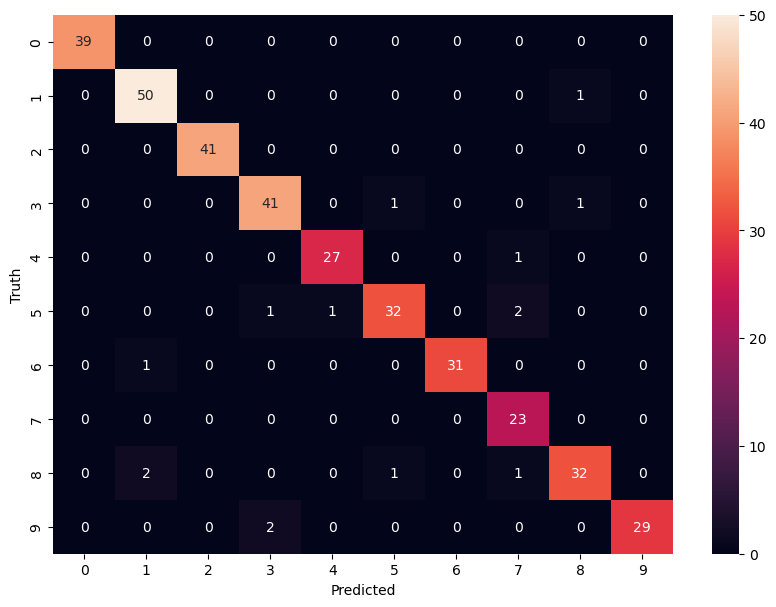

In [451]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')